# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [ ]:
# mean
amounts = [3505, 2400, 3027, 2798, 3700, 3520, 2689]
mean_value = sum(amounts)/len(amounts)
print("mean is: " + str(mean_value))


mean is: 3091.285714285714


In [ ]:
# standard deviation
def stdev(List):
  avg=sum(List)*1.0/len(List)
  var=list(map(lambda x: (x - avg)**2, List))
  return(sum(var)*1.0/len(var))**0.5
print(stdev(amounts))

455.9679544772901


In [ ]:
def var(values):
  return mean([(i-mean_value) ** 2 for i in values])
print(var(amounts))

207906.7755102041


In [ ]:
import numpy as np
import math
import pandas as pd

In [ ]:
# checking from lecture
def subtract_mean(number):
  return number-mean_value

lambda x:x-mean_value

<function __main__.<lambda>>

In [ ]:
distances = list(map(subtract_mean, amounts))
distances

[413.7142857142858,
 -691.2857142857142,
 -64.28571428571422,
 -293.2857142857142,
 608.7142857142858,
 428.7142857142858,
 -402.2857142857142]

In [ ]:
squared_distances = list(map(lambda x:x**2, distances))

In [ ]:
list_length = len(squared_distances)-1
list_length

6

In [ ]:
# variance
variance_amounts = sum(squared_distances)/list_length
variance_amounts

242557.90476190482

In [ ]:
df['amounts'].mean()

3091.285714285714

In [ ]:
print(df['amounts'].var(ddof=0))
print(df['amounts'].std(ddof=1))

# used 0 for ddof in var to check on the value i got for the function created above

207906.7755102041
492.5016799584595


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [ ]:
# new list
customers = [127, 80, 105, 92, 120, 115, 93]

In [ ]:
# cov from numpy
np.cov(amounts, customers)

array([[242557.9047619 ,   8073.64285714],
       [  8073.64285714,    290.95238095]])

In [ ]:
pd.DataFrame(np.cov(amounts, customers))

,0,1
0,242557.904762,8073.642857
1,8073.642857,290.952381


In [ ]:
df = pd.DataFrame({'amounts': amounts})
df['customers'] = pd.Series(customers)
df

,amounts,customers
0,3505,127
1,2400,80
2,3027,105
3,2798,92
4,3700,120
5,3520,115
6,2689,93


In [ ]:
# cov from pandas
df.cov()

,amounts,customers
amounts,242557.904762,8073.642857
customers,8073.642857,290.952381


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [ ]:
# standard deviation of customers & sales amount
std_c = df['customers'].std(ddof=1)
std_a = df['amounts'].std(ddof=1)
std_c, std_a

(17.057326313123664, 492.5016799584595)

In [ ]:
# covariance with pandas
cov_ac = df['amounts'].cov(df['customers'])
cov_ac

8073.642857142856

In [ ]:
denom = std_a*std_c
denom

8400.761864813041

In [ ]:
# correlation
corr_ac = cov_ac/denom
corr_ac

0.9610607927073451

In [ ]:
df['amounts'].corr(df['customers'])

0.9610607927073453

In [ ]:
df.corr()

,amounts,customers
amounts,1.000000,0.961061
customers,0.961061,1.000000


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [ ]:
url = 'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv'
titanic = pd.read_csv(url, index_col=0)
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [ ]:
# covariance for the entire dataset
titanic.cov()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [ ]:
titanic.corr()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


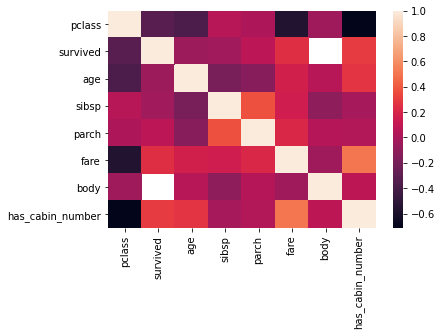

In [ ]:
# heatmap
import seaborn as sns
sns.heatmap(titanic.corr());

# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

In [ ]:
# orthogonal is perpendicular (having a right angle)
import matplotlib.pyplot as plt
vector_1 = [0, 3]
vector_2 = [-4, 0]

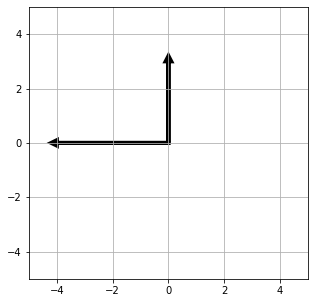

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
ax.grid()
plt.xlim(-5, 5)
plt.ylim(-5, 5)
for vect in [vector_1, vector_2]:
  plt.arrow(0,0, vect[0], vect[1], head_width=.2, head_length=0.2, linewidth=4)
plt.show()

In [ ]:
# check if orthogonal, dot product must be == 0
np.dot(vector_1, vector_2)

0

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [ ]:
a = np.array([-5,3,7])
b = np.array([6,-8,2])
np.dot(a,b)
# no because the dot product does not equal to 0

-40

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [ ]:
c = np.array([2, -15, 6, 20])
c

array([  2, -15,   6,  20])

In [ ]:
c_squared = list(map(lambda x: x**2, c))
c_squared

[4, 225, 36, 400]

In [ ]:
cxc = np.multiply(c,c)
cxc

array([  4, 225,  36, 400])

In [ ]:
cT = c.T
cTc = np.multiply(cT, c)
print(cT)
cTc

[  2 -15   6  20]


array([  4, 225,  36, 400])

In [ ]:
# all quantities yield to same resultts

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{table}[]
\begin{tabular}{|l|l|}
\hline
vector d & vector e \\ \hline
7        & 2        \\ \hline
12       & 11       \\ \hline
         & -8       \\ \hline
\end{tabular}
\end{table}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [ ]:
# unit vector
f = np.array([4, 12 ,11, 9, 2])
f_hat = f/np.linalg.norm(f)
print(f)
f_hat

[ 4 12 11  9  2]


array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

In [ ]:
# linear dependent vectors
vector_01 = [1.5, -.7]
vector_02 = np.multiply(vector_01, 2)
vector_01, vector_02

([1.5, -0.7], array([ 3. , -1.4]))

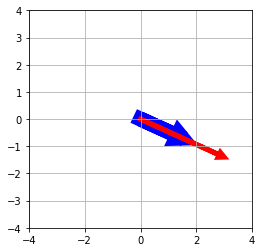

In [ ]:
# plot
fig, ax = plt.subplots(figsize=(4,4))
ax.grid()
plt.xlim(-4, 4)
plt.ylim(-4, 4)
for myvect, mycolor, mywidth in [(vector_01, 'blue', 15), (vector_02, 'red', 5)]:
  plt.arrow(0,0,
            myvect[0],
            myvect[1],
            head_width=.2,
            head_length=.2,
            linewidth=mywidth,
            color=mycolor,
            length_includes_head=True);

In [ ]:
# linearly independent
vector_01 = [1.5, -.7]
vector_03 = [-2, -1.3]
vector_01, vector_03

([1.5, -0.7], [-2, -1.3])

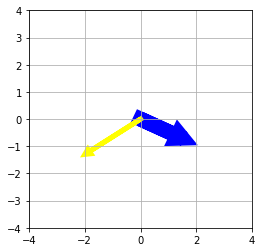

In [ ]:
fig, ax = plt.subplots(figsize=(4,4))
ax.grid()
plt.xlim(-4, 4)
plt.ylim(-4, 4)
for myvect, mycolor, mywidth in [(vector_01, 'blue', 15), (vector_03, 'yellow', 5)]:
  plt.arrow(0,0,
            myvect[0],
            myvect[1],
            head_width=.2,
            head_length=.2,
            linewidth=mywidth,
            color=mycolor,
            length_includes_head=True);

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

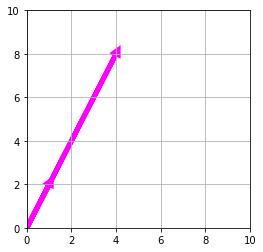

In [ ]:
vector_g = np.array([1, 2])
vector_h = np.array([4, 8])
fig, ax = plt.subplots(figsize=(4,4))
ax.grid()
plt.xlim(0,10)          
plt.ylim(0,10)

# Display
for myvect in [vector_g, vector_h]:
    plt.arrow(0,0,
              myvect[0], 
              myvect[1], 
              head_width=.2, 
              head_length=0.2, 
              linewidth=5, 
              color='magenta')

In [ ]:
# possible linear combination
a,b=(4,2)
linear_combo=np.multiply(vector_g, a) + np.multiply(vector_g, b)
print(linear_combo)

[ 6 12]


In [ ]:
combo_sets=[]
for (a,b) in [(2,3), (4,5), (6,7), (8,9)]:
  linear_combo = np.multiply(vector_1, a) + np.multiply(vector_2, b) 
  combo_sets.append(linear_combo)
print(combo_sets)

[array([-12,   6]), array([-20,  12]), array([-28,  18]), array([-36,  24])]


## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [ ]:
vector_l = np.array([1,2,3])
vector_m = np.array([-1,0,7])
vector_n = np.array([4,8,2])


In [ ]:
a,b,c = (2,3,4)
linear_com = np.multiply(vector_l, a) + np.multiply(vector_m, b) + np.multiply(vector_n, c)
print(linear_com)

[15 36 35]


# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



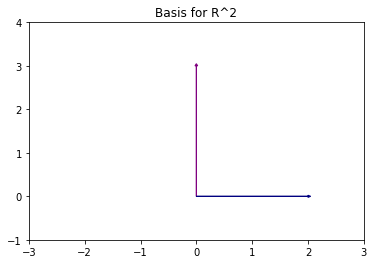

In [ ]:
# find basis vectors in 2-d
vector_1 = [0, 3]
vector_2 = [2, 0]

# Plot the Scaled Vectors
plt.arrow(0,0, vector_1[0], vector_1[1],head_width=.05, head_length=0.05, color ='purple')
plt.arrow(0,0, vector_2[0], vector_2[1],head_width=.05, head_length=0.05, color ='navy')
plt.xlim(-3,3)          
plt.ylim(-1,4)
plt.title("Basis for R^2")
plt.show()

## 6.2 What does it mean to form a basis?

form a family of linearly independent vectors which spans a given vector space

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [ ]:
# rank 3
P = np.array([[1,2,3],[-1,0,7],[4,8,2]])
np.linalg.matrix_rank(P)

3

## 7.2 What does the rank of a matrix tell us?

Rank means the number of dimensions in the output of a matrix that's used for linear transformation.

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

In [ ]:
# vectors
v = np.array([1,3])
w = np.array([-1,2])
# dot product
w_dot_v = np.dot(v, w)
v_dot_v = np.dot(v, v)
#projection
fraction = w_dot_v/v_dot_v
projection = np.multiply(fraction,v)
print(projection)

[0.5 1.5]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


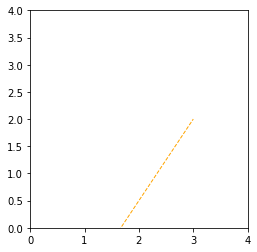

In [ ]:
# Plot
plt.xlim(0,4)          
plt.ylim(0,4)

axes = plt.gca()
plt.axes().set_aspect('equal')
plt.plot(v, w, '--', color='orange', linewidth=1);

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

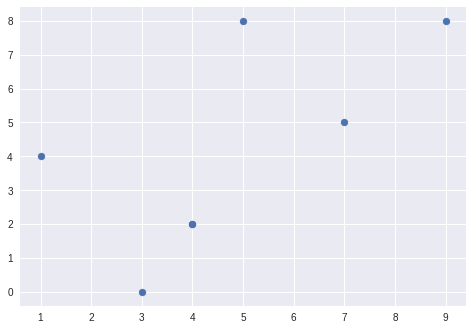

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()